In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

filename = 'GlobalYouTubeStatistics.csv'
df = pd.read_csv(filename, encoding='latin1')

In [2]:
missing_values = df.isnull().sum()

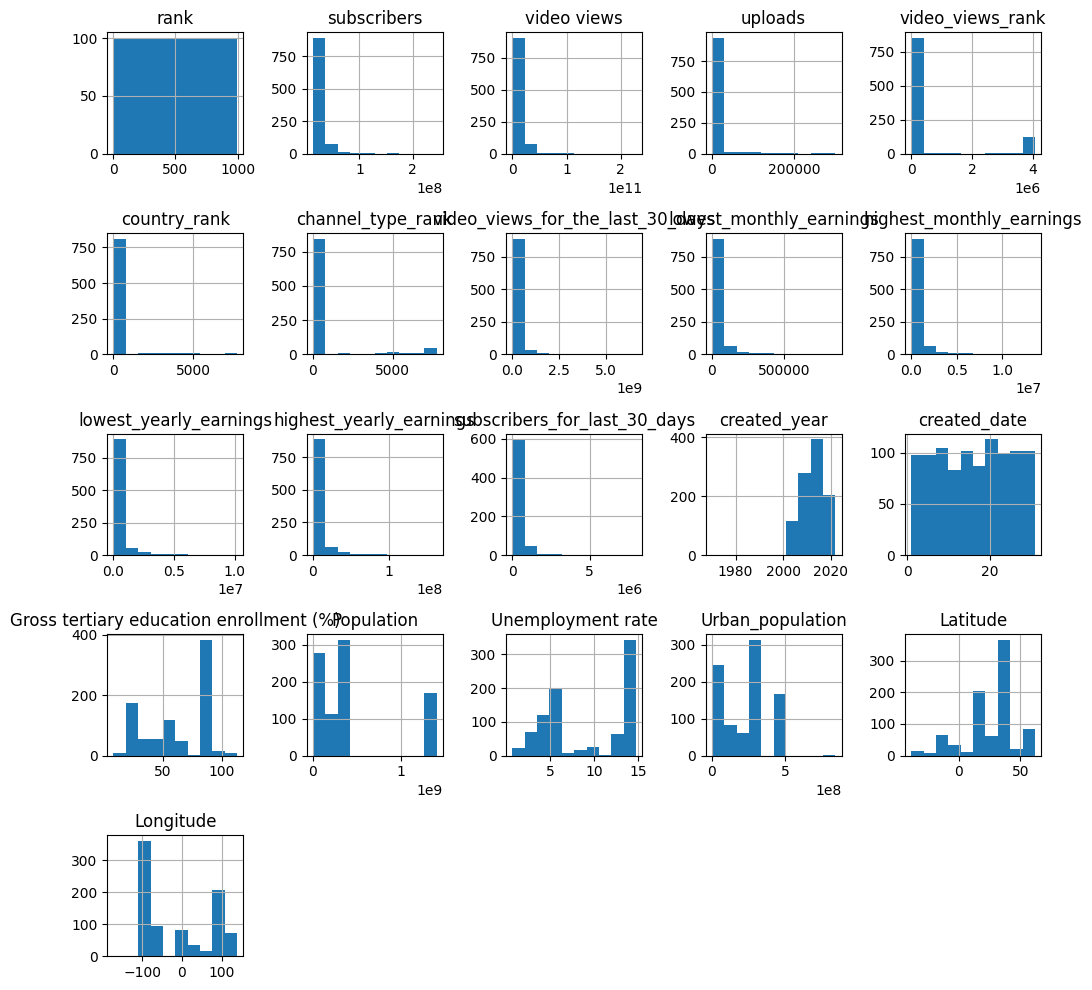

In [3]:
df.describe()

df['category'].unique()

numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_cols].hist(figsize=(10,10))
plt.tight_layout()
plt.show()


In [4]:
edu_df = df[df['category'] == 'Education']

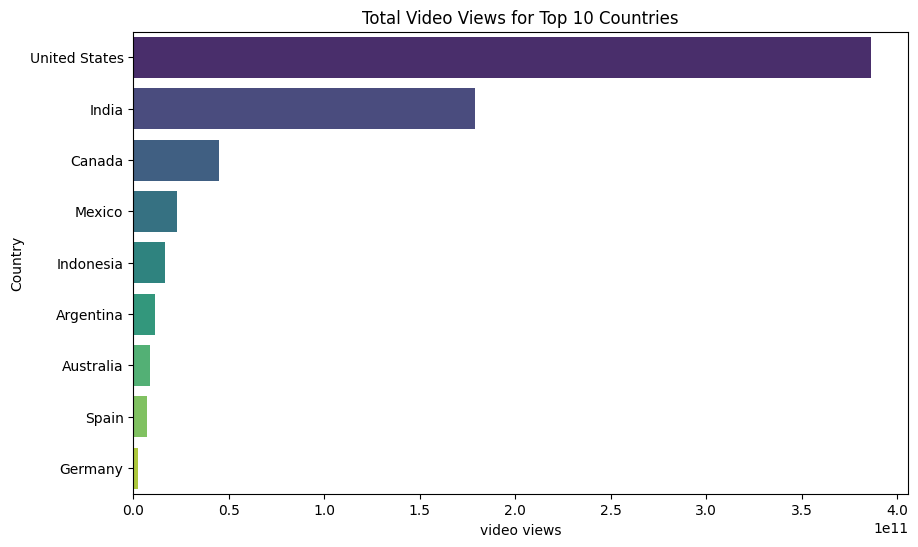

In [5]:
country_stats = edu_df.groupby('Country').agg({
    'Youtuber': 'count', 
    'subscribers': 'sum',
    'video views': 'sum'  
}).reset_index()

country_stats.sort_values(by='video views', ascending=False, inplace=True)

plt.figure(figsize=(10,6))
sns.barplot(x='video views', y='Country', data=country_stats.head(10), palette='viridis')
plt.title('Total Video Views for Top 10 Countries')
plt.show()


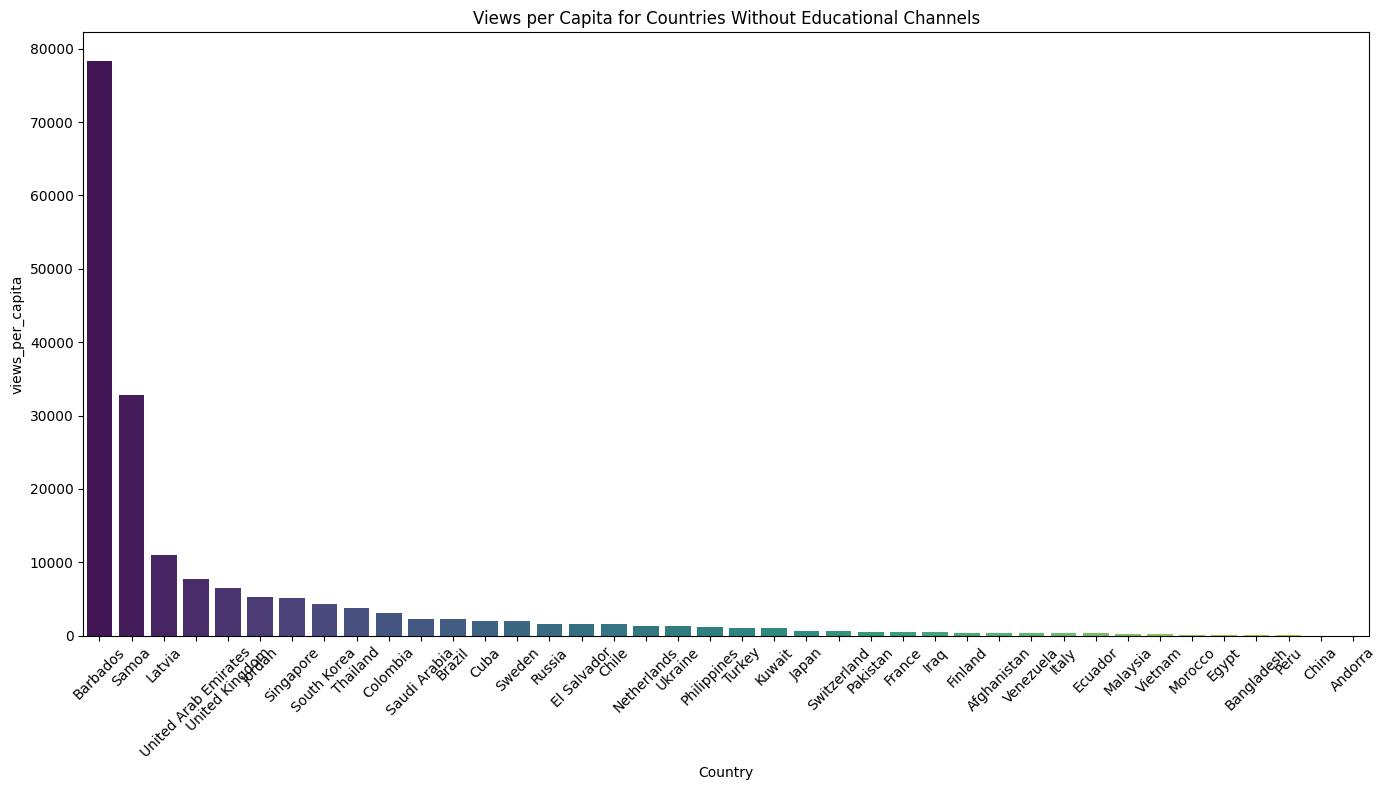

In [6]:
total_stats = df.groupby('Country').agg({
    'Youtuber': 'count', 
    'subscribers': 'sum', 
    'video views': 'sum', 
    'Population': 'first'  
}).reset_index()

merged_stats = total_stats.merge(country_stats, on='Country', how='left', suffixes=('_total', '_edu'))

no_edu_countries = merged_stats[merged_stats['Youtuber_edu'].isna()].copy()  

no_edu_countries['views_per_capita'] = no_edu_countries['video views_total'] / no_edu_countries['Population']

no_edu_countries = no_edu_countries.sort_values(by='views_per_capita', ascending=False)

plt.figure(figsize=(14,8))  
sns.barplot(y='views_per_capita', x='Country', data=no_edu_countries, palette='viridis')
plt.title('Views per Capita for Countries Without Educational Channels')
plt.xticks(rotation=45, fontsize=10) 
plt.tight_layout()
plt.show()


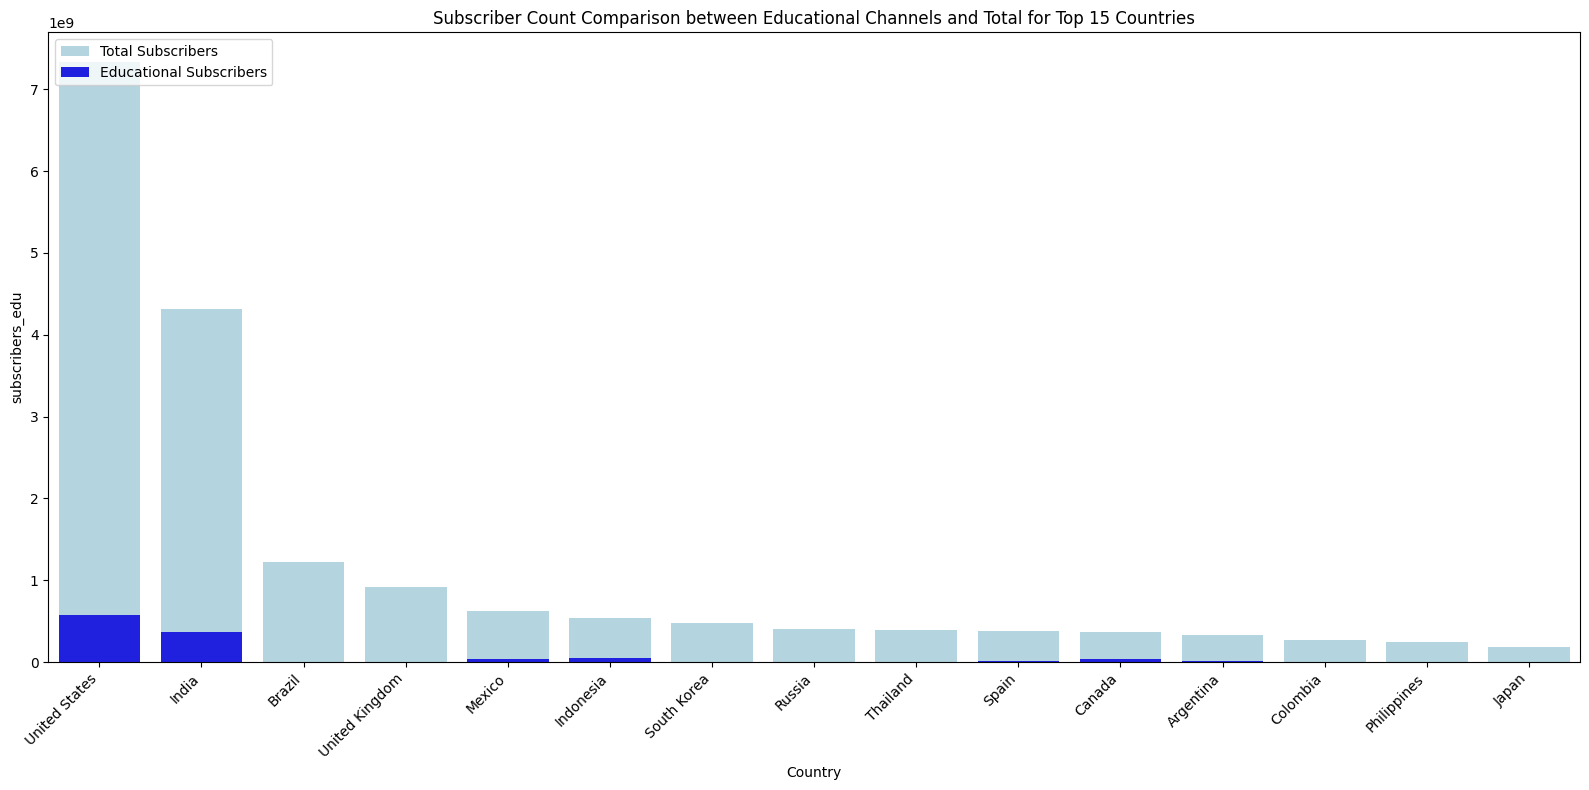

In [7]:
top_n = 15
sorted_stats = merged_stats.sort_values(by='subscribers_total', ascending=False).head(top_n)

plt.figure(figsize=(16,8))
sns.barplot(x='Country', y='subscribers_total', data=sorted_stats, color='lightblue', label='Total Subscribers')
sns.barplot(x='Country', y='subscribers_edu', data=sorted_stats, color='blue', label='Educational Subscribers')
plt.title('Subscriber Count Comparison between Educational Channels and Total for Top {} Countries'.format(top_n))
plt.legend()
plt.xticks(rotation=45, ha='right', fontsize=10)  
plt.tight_layout()
plt.show()
